### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Practical activity: Pre-processing textural data from social media

**This is the solution to the activity.**

We will continue working with the data analytics team at Tumble Confectionery. Recall that the product line includes a range of chocolate products in unusual flavour combinations, and the company is using social media to research potential new flavours.

The product manager has a hunch that a cheesecake flavour would be a good addition to the product line. You have been asked to research the sentiment towards cheesecake on Twitter. We will look at some tweets about cheesecake straight from Twitter and apply natural language processing steps in order to comprehend the data at scale.Your objective is to:

- identify positive and negative sentiments related to cheesecake
- use the polarity score function and identify related words
- visualise the output to present back to the business to help them decide on adding a flavour to their product line.

# Pre-processing
##  Prepare your workstation

In [1]:
# Copy the YAML file and your Twitter keys over to this Jupyter Notebook before you start to work
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the yaml file - remember to specify the whole path and use / between directories
twitter_creds = yaml.safe_load(open('C:/Users/Miffy/Desktop/Course 3/Week 3/Data sets/twitter.yaml', 'r').read())

In [2]:
# View the keys in the dictionary
twitter_creds.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret'])

In [3]:
# Pass your twitter credentials
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

# See if you are connected
print(twitter_api)

In [4]:
# Run a test with #python
python_tweets = twitter_api.search.tweets(q="#python")

# View output
print(python_tweets)

{'statuses': [{'created_at': 'Thu Jun 09 06:18:41 +0000 2022', 'id': 1534782011944374272, 'id_str': '1534782011944374272', 'text': 'RT @AI_Miami: The Ultimate Guide to Learning About #ArtificialIntelligence!\n\nvia @parvezshahshaik \n\n#100DaysOfCode #AI #Analytics #CyberSec…', 'truncated': False, 'entities': {'hashtags': [{'text': 'ArtificialIntelligence', 'indices': [51, 74]}, {'text': '100DaysOfCode', 'indices': [100, 114]}, {'text': 'AI', 'indices': [115, 118]}, {'text': 'Analytics', 'indices': [119, 129]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AI_Miami', 'name': 'Human-Centered AI', 'id': 1109544277196054533, 'id_str': '1109544277196054533', 'indices': [3, 12]}, {'screen_name': 'parvezshahshaik', 'name': 'Parvez', 'id': 1193120599247224832, 'id_str': '1193120599247224832', 'indices': [81, 97]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 

## 1. Test connection

In [5]:
# Query the term cheesecake
q = {'q':'cheesecake', 'count':100, 'result_type':'recent'}

# Set the resulte to an empty list
results = []

while len(results) < 30:
    query = twitter_api.search.tweets(**q)
    q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
    results.append(query)
    
# Determine the number of results
len(results)    

30

## 2. Create DataFrames

In [6]:
# Import pandas to join the DataFrames
import pandas as pd

# Concat DataFrames
results_list_pd = pd.concat([pd.DataFrame(_['statuses']) for _ in results])

# View shape of output
results_list_pd.shape

(3000, 30)

In [7]:
results_list_pd.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,Thu Jun 09 06:18:45 +0000 2022,1534782030084448257,1534782030084448257,RT @DessertPassion: Strawberry Cheesecake. htt...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1534747257962110978, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,74,0,False,False,False,en,NaN,NaN,NaN
1,Thu Jun 09 06:18:34 +0000 2022,1534781984630767620,1534781984630767620,RT @Arifer2710: Mi mamá una profesional sin tr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,1086,0,False,False,NaN,es,NaN,NaN,NaN
2,Thu Jun 09 06:18:26 +0000 2022,1534781949788553216,1534781949788553216,RT @sejadahbysara: first time menyesal order g...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,5573,0,False,False,NaN,in,NaN,NaN,NaN
3,Thu Jun 09 06:18:20 +0000 2022,1534781926044798976,1534781926044798976,How about chocolate cheesecake 😍🤩👌😋 again from...,False,"{'hashtags': [{'text': 'mercadonegro', 'indice...","{'media': [{'id': 1534781920067960833, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,0,0,False,False,False,en,NaN,NaN,NaN
4,Thu Jun 09 06:18:13 +0000 2022,1534781893874688000,1534781893874688000,RT @chenleours: #chenle &amp; jaemin line voom...,False,"{'hashtags': [{'text': 'chenle', 'indices': [1...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,42,0,False,False,NaN,en,NaN,NaN,NaN


In [8]:
# Determine values of output
results_list_values = results_list_pd['text'].values

In [9]:
results_list_values

array(['RT @DessertPassion: Strawberry Cheesecake. https://t.co/PJ6eoQ44YF',
       'RT @Arifer2710: Mi mamá una profesional sin trabajo, era docente pero en la pandemia la despidieron, lleva dos años y medio sin trabajar ti…',
       'RT @sejadahbysara: first time menyesal order grande, sedak dooh nak mampos flavour baru starbucks nih. full cheesecake dap gila.\n\nStrawberr…',
       ...,
       'RT @Arifer2710: Mi mamá una profesional sin trabajo, era docente pero en la pandemia la despidieron, lleva dos años y medio sin trabajar ti…',
       '@swissghoul_l birthday bestie !!! how’s your day going ?? i got flan, cheesecake, and oreos :))',
       'RT @DessertPassion: Chocolate Cheesecake. https://t.co/3VrYat9A2y'],
      dtype=object)

## 3. Investigate tweets

In [10]:
# Import nltk and the required resources
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Miffy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Look at one raw tweet
results_list_values[1]

'RT @Arifer2710: Mi mamá una profesional sin trabajo, era docente pero en la pandemia la despidieron, lleva dos años y medio sin trabajar ti…'

In [12]:
# Split up each tweet into individual words
results_list_values_token = [word_tokenize(_) for _ in results_list_values]

In [13]:
results_list_values_token

[['RT',
  '@',
  'DessertPassion',
  ':',
  'Strawberry',
  'Cheesecake',
  '.',
  'https',
  ':',
  '//t.co/PJ6eoQ44YF'],
 ['RT',
  '@',
  'Arifer2710',
  ':',
  'Mi',
  'mamá',
  'una',
  'profesional',
  'sin',
  'trabajo',
  ',',
  'era',
  'docente',
  'pero',
  'en',
  'la',
  'pandemia',
  'la',
  'despidieron',
  ',',
  'lleva',
  'dos',
  'años',
  'y',
  'medio',
  'sin',
  'trabajar',
  'ti…'],
 ['RT',
  '@',
  'sejadahbysara',
  ':',
  'first',
  'time',
  'menyesal',
  'order',
  'grande',
  ',',
  'sedak',
  'dooh',
  'nak',
  'mampos',
  'flavour',
  'baru',
  'starbucks',
  'nih',
  '.',
  'full',
  'cheesecake',
  'dap',
  'gila',
  '.',
  'Strawberr…'],
 ['How',
  'about',
  'chocolate',
  'cheesecake',
  '😍🤩👌😋',
  'again',
  'from',
  '#',
  'mercadonegro',
  '#',
  'desert',
  '#',
  'cheesecake',
  '#',
  'foodporn',
  '#',
  'foodpornagraphy',
  'https',
  ':',
  '//t.co/RR5yWISQox'],
 ['RT',
  '@',
  'chenleours',
  ':',
  '#',
  'chenle',
  '&',
  'amp',
  ';',


In [14]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
all_english_words = set(words.words())

In [15]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.

results_list_values_token_nostop =\
[[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words]\
 for x in results_list_values_token]

In [16]:
# Let's have a look at the same tweet as above
results_list_values_token_nostop[1]

['mi', 'sin', 'era', 'en', 'la', 'pandemia', 'la', 'dos', 'medio', 'sin']

In [17]:
results_list_values_token_nostop[2]

['first',
 'time',
 'order',
 'nak',
 'flavour',
 'baru',
 'full',
 'cheesecake',
 'dap']

# NLTK sentiment analysis 
## 1. Import NLTK

In [18]:
# import the prebuilt rules and values of the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Miffy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
# Import the vader classs and create a object of the analyzer called Darth Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia
darth_vader = SentimentIntensityAnalyzer()

In [20]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

results_list_values_token_nostop_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in results_list_values_token_nostop}

In [21]:
results_list_values_token_nostop_polarity

{'strawberry cheesecake': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'mi sin era en la pandemia la dos medio sin': {'neg': 0.474,
  'neu': 0.526,
  'pos': 0.0,
  'compound': -0.802},
 'first time order nak flavour baru full cheesecake dap': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'chocolate cheesecake desert cheesecake': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'line interview food days cheesecake specific brand': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 '': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'chocolate cheesecake': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'de': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'character item cheesecake sword bamboo stick meat': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'flavor day blueberry cheesecake sherbet': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'cheesecake': {'neg': 0.0, 'neu': 1.

## 2. Create a Pandas DataFrame

In [22]:
# Convert the list of dictionary results to a pandas dataframe. 
# The index is the cleaned tweet.
# We can see some of the highly positive words 

polarity_pd = pd.DataFrame(results_list_values_token_nostop_polarity).T

In [23]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 5 most positive cleaned tweets related to cheesecake
polarity_pd.sort_values('pos', ascending=0).head(5)

,neg,neu,pos,compound
want please,0.0,0.000,1.000,0.3818
enjoy,0.0,0.000,1.000,0.4939
good,0.0,0.000,1.000,0.4404
easy fall love,0.0,0.123,0.877,0.7964
absolutely beautiful pride cheesecake delicious pride,0.0,0.131,0.869,0.9224


In [24]:
# Get the top 5 most negative words related to cheesecake
polarity_pd.sort_values('neg', ascending=0).head(5)

,neg,neu,pos,compound
miss,1.000,0.000,0.0,-0.1531
hate cheesecake,0.787,0.213,0.0,-0.5719
cheesecake disgusting,0.773,0.227,0.0,-0.5267
prison cheesecake,0.767,0.233,0.0,-0.5106
cheesecake gross,0.756,0.244,0.0,-0.4767


In [25]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.1 so slightly positive
polarity_pd['compound'].describe()

count    1359.000000
mean        0.118712
std         0.323844
min        -0.877900
25%         0.000000
50%         0.000000
75%         0.361200
max         0.936000
Name: compound, dtype: float64

## 3. Plot the output

In [26]:
polarity_pd['compound'].sort_values().reset_index()

,index,compound
0,horrific happen manage kill people understanding,-0.8779
1,man hell cheesecake yo ass,-0.8442
2,tremble type dangerous sickening experience ch...,-0.8225
3,mi sin era en la pandemia la dos medio sin,-0.8020
4,deep everyone dead today lonely bean holding c...,-0.7783
...,...,...
1354,good oh love feel oh goodness grateful,0.9201
1355,checkers one free small cheesecake factory fre...,0.9217
1356,absolutely beautiful pride cheesecake deliciou...,0.9224
1357,like cheesecake love really easy make deliciou...,0.9307


In [27]:
df = polarity_pd.reset_index()['compound'].sort_values()
df.reset_index(drop=True)

0      -0.8779
1      -0.8442
2      -0.8225
3      -0.8020
4      -0.7783
         ...  
1354    0.9201
1355    0.9217
1356    0.9224
1357    0.9307
1358    0.9360
Name: compound, Length: 1359, dtype: float64

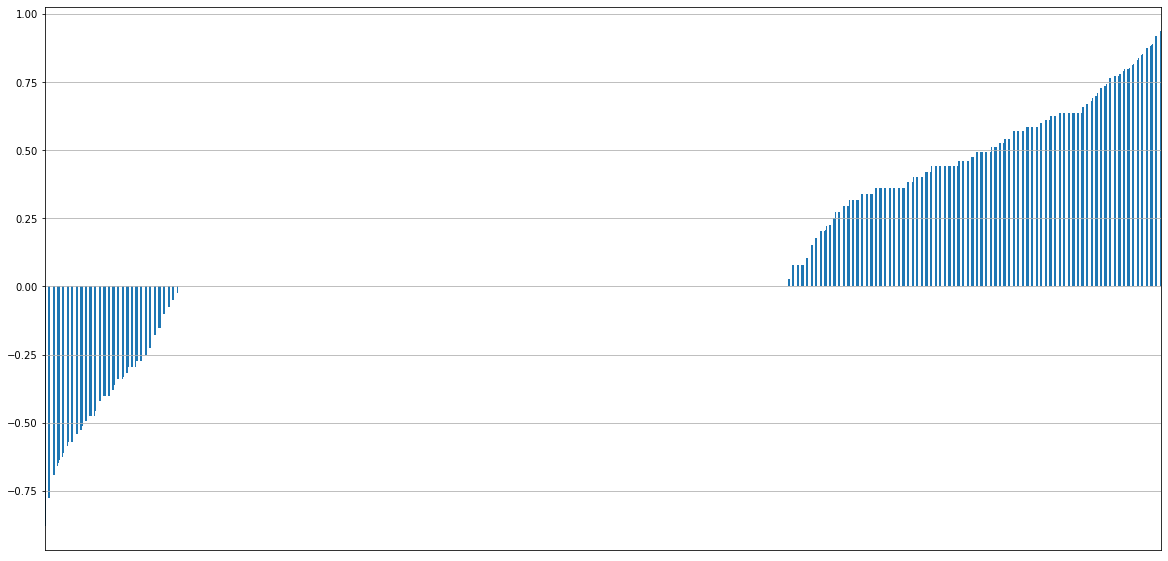

In [28]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# create an empty plot
fig, ax = plt.subplots()

fig = df.plot(kind='bar', figsize=(20,10))

ax.get_xaxis().set_visible(False)

plt.grid()

plt.show()
plt.close()

<AxesSubplot:>

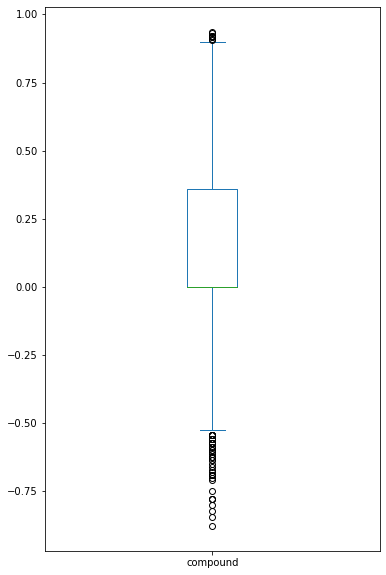

In [29]:
# The boxplot is a nice way to see how many values sit on the edges as outliers.
df.plot(kind='box', figsize=(6, 10))